import numpy as np
import pandas as pd
import seaborn as sns
import subprocess
import matplotlib.pyplot as plt

# Correr algoritmos

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import subprocess
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
def correr_instancia(algoritmo, n): 
    result = subprocess.run([f'../cpp/{algoritmo}'], stdout=subprocess.PIPE, input=n, encoding='ascii')
    return int(result.stdout.split('\n')[0])

In [9]:
# Ejemplo de corrida
correr_instancia('kahan', '10000')

77775

In [11]:
resultados = []
algoritmos = ['kahan', 'sorting', 'comoviene']
#for n in [10**x for x in range(7)]:
for n in tqdm(range(0, 10000, 100)):
#     if n%1000==0:
#         print(n)
    for algoritmo in algoritmos:
        for _ in range(10):
            tiempo =  correr_instancia(algoritmo, str(n))
            resultados.append([n, algoritmo, tiempo])

df_resultados = pd.DataFrame(resultados, columns=['n', 'algoritmo', 'tiempo'])

100%|██████████| 100/100 [00:11<00:00,  8.94it/s]


In [6]:
df_resultados.head()

n algoritmo  tiempo
0  0     kahan     235
1  0     kahan   17819
2  0     kahan     155
3  0     kahan     129
4  0     kahan      88

# Analizar resultados

# Comparacion algoritmos

In [53]:
df_algoritmo = df_resultados.groupby(['n', 'algoritmo'])['tiempo'].mean().reset_index()
df_algoritmo.head()

n  algoritmo  tiempo
0    0  comoviene   162.7
1    0      kahan   156.3
2    0    sorting   461.6
3  100  comoviene   582.0
4  100      kahan  1367.0

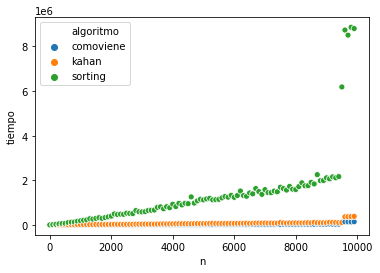

In [54]:
sns.scatterplot(data=df_algoritmo, x='n', y='tiempo', hue='algoritmo')

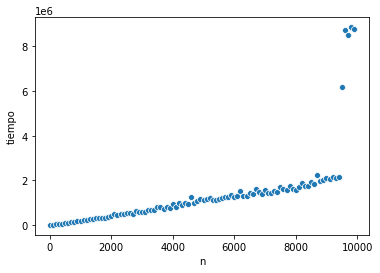

In [55]:
sns.scatterplot(data=df_algoritmo[df_algoritmo['algoritmo'] == 'sorting'], x='n', y='tiempo')

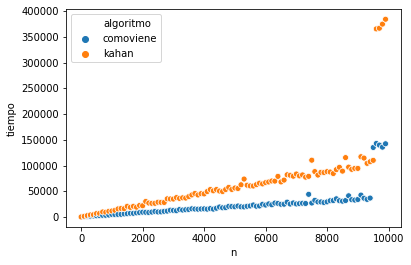

In [56]:
sns.scatterplot(data=df_algoritmo[df_algoritmo['algoritmo'] != 'sorting'], x='n', y='tiempo', hue='algoritmo')